In [1]:
import torch
import matplotlib.pyplot as plt
from torchmetrics import JaccardIndex


/home/dqian/miniconda3/envs/NYU-DL/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: '/home/dqian/miniconda3/envs/NYU-DL/lib/python3.10/site-packages/torchvision/image.so: undefined symbol: _ZN5torch3jit17parseSchemaOrNameERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
# Load our own modules
import sys

sys.path.append("../src")

from data import *

In [3]:
dataset = ValidationDataset("../Dataset_Student")
labeled = LabeledDataset("../Dataset_Student")
unlabeled = UnlabeledDataset("../Dataset_Student")


In [17]:
model = torch.load("../seg_nopt.pth", map_location=torch.device('cpu'))


tensor([[ 0.0681,  0.0075, -0.0291,  0.0539, -0.0058,  0.0929,  0.0023,  0.0255,
         -0.0681,  0.0544,  0.0220, -0.0335, -0.0396, -0.0419,  0.0561,  0.0552,
         -0.0583,  0.0765,  0.0546,  0.0685, -0.0501, -0.0588, -0.0106,  0.0304,
          0.0651, -0.1045, -0.0688, -0.0357,  0.0067, -0.0036, -0.0575,  0.0832,
          0.0249,  0.0309,  0.0015, -0.0316,  0.0530,  0.0102, -0.0527,  0.0436,
          0.0130, -0.0567,  0.0237,  0.0698, -0.0354,  0.0797,  0.0240, -0.0447,
         -0.0081]])
tensor([[[ 5,  5, 17,  ...,  5,  5,  5],
         [ 5,  5,  5,  ...,  5,  5,  5],
         [ 5,  5,  5,  ...,  5,  5,  0],
         ...,
         [ 5,  5,  5,  ...,  5,  5,  5],
         [ 5,  5,  5,  ...,  5,  5,  5],
         [ 5,  5,  5,  ...,  5,  5,  5]]])
tensor(45)


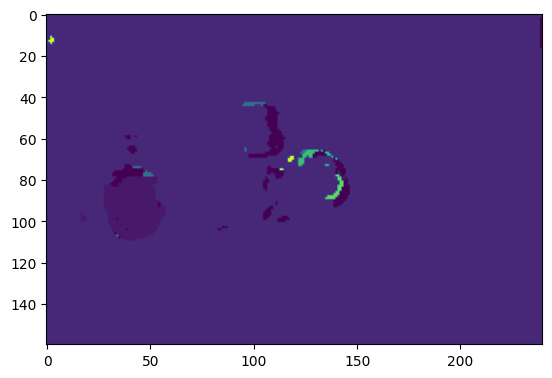

In [51]:
# First, get a mask and observe it
model.eval()

with torch.no_grad():
    x, label = labeled[2]
    x = x.unsqueeze(0)

    x = x[:, :11]
    # Transpose, since video resnet expects channels as first dim
    x = x.transpose(1, 2)
    output = model(x)
    
    print(output[:,:,0, 0])
    
    mask = torch.argmax(output, dim=1)
    print(mask)
    print(torch.max(mask))
    
plt.imshow(mask[0])


46


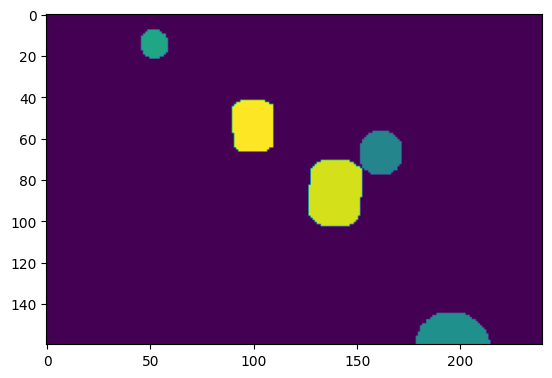

In [48]:

plt.imshow(label[21])
print(np.max(label[21]))


In [46]:
iou = JaccardIndex(task="multiclass", num_classes=49)

target = torch.tensor(label[21])
print(target.shape)
print(mask.shape)

print(iou(mask.squeeze(), target))


torch.Size([160, 240])
torch.Size([1, 160, 240])
tensor(0.0007)
